In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from scipy.stats import boxcox
import folium
import seaborn as seabornInstance
%matplotlib inline

In [21]:
df = pd.read_csv('happiness.csv', sep = ';')

In [22]:
df = df.groupby(['country_name', 'regional_indicator'])[['life_ladder','log_gdp_per_capita','social_support', 'healthy_life_expectancy_at_birth',
       'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption']].mean().sort_values(by= 'perceptions_of_corruption', ascending = False).reset_index()

In [23]:
df.dropna(inplace=True)

In [24]:
df.isnull().any()

country_name                        False
regional_indicator                  False
life_ladder                         False
log_gdp_per_capita                  False
social_support                      False
healthy_life_expectancy_at_birth    False
freedom_to_make_life_choices        False
generosity                          False
perceptions_of_corruption           False
dtype: bool

In [25]:
df.perceptions_of_corruption.fillna((df.perceptions_of_corruption.mean()), inplace=True)
df

,country_name,regional_indicator,life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Romania,Central and Easten European,5.525715,9.884431,0.782008,65.856923,0.731524,-0.148165,0.953186
1,Bosnia and Herzegovina,Central and Easten European,5.163592,9.293985,0.773327,66.993333,0.477317,0.039052,0.946546
2,Bulgaria,Central and Easten European,4.481121,9.731810,0.885042,66.145454,0.651483,-0.156156,0.945708
3,Romania,Central and Eastern Europe,6.131850,10.195792,0.828581,67.281119,0.843912,-0.208408,0.936150
4,Bulgaria,Central and Eastern Europe,5.183750,9.942659,0.934420,66.901989,0.766589,-0.119954,0.933793
...,...,...,...,...,...,...,...,...,...
178,Finland,Western Europe,7.608940,10.623374,0.948810,71.224345,0.939420,0.000596,0.246709
179,Denmark,Western Europe,7.684721,10.742603,0.957547,71.227656,0.946030,0.163603,0.196232
180,Rwanda,Sub-Saharan Africa,3.612927,7.421688,0.608992,58.109918,0.872409,0.019199,0.184429
181,Qatar,Middle East and North Africa,6.568982,11.682664,0.863325,67.187999,0.898004,0.104738,0.183798


C:\Users\Solange Kamiya\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='perceptions_of_corruption', ylabel='Density'>

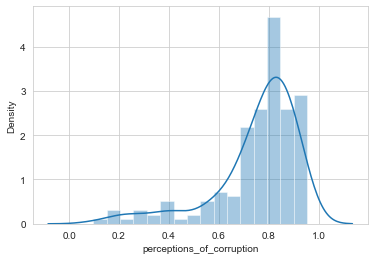

In [26]:
sns.distplot(df['perceptions_of_corruption'])

In [27]:
aval = pd.DataFrame({'Model':[],
                          'Details':[],
                          'Root Mean Squared Error (RMSE)': [],
                          'R-squared (training)': [],
                          'Adjusted R-squared (training)': [],
                          'R-squared (test)':[],
                          'Adjusted R-squared(test)':[],
                           '5-Fold Cross Validation':[]
                          })

In [28]:
def adjustedR2(r2,n,k):
    return r2-(k-1)/(n-k)*(1-r2)

In [29]:
train_data, test_data = train_test_split(df, train_size = 0.2, random_state = 3)
model = LinearRegression()
X_train = np.array(train_data['log_gdp_per_capita'],
                   dtype = pd.Series).reshape(-1,1)
y_train = np.array(train_data['perceptions_of_corruption'], dtype = pd.Series)
model.fit(X_train, y_train)

X_test = np.array(test_data['log_gdp_per_capita'], 
                    dtype = pd.Series).reshape(-1,1)
y_test = np.array(test_data['perceptions_of_corruption'], dtype = pd.Series)

pred = model.predict(X_test)
#ROOT MEAN SQUARED ERROR
rmsesm = float(format(np.sqrt(mean_squared_error(y_test,pred)),'.3f'))
#R-SQUARED (TRAINING)
rtrsm = float(format(model.score(X_train, y_train),'.3f'))
#R-SQUARED (TEST)
rtesm = float(format(model.score(X_test, y_test),'.3f'))
cv = float(format(cross_val_score(model,df[['log_gdp_per_capita']],df['perceptions_of_corruption'],cv=5).mean(),'.3f'))

print ("Average Score for Test Data: {:.3f}".format(y_test.mean()))
print('Intercept: {}'.format(model.intercept_))
print('Coefficient: {}'.format(model.coef_))
print('Corruption score = ',np.round(model.intercept_,4),
      '+',np.round(model.coef_,4),'*log_gdp_per_capita ')

r = aval.shape[0]
aval.loc[r] = ['Simple Linear Regression log_gdp_per_capita ','-',rmsesm,rtrsm,'-',rtesm,'-',cv]
aval

Average Score for Test Data: 0.754
Intercept: 1.3529177785844573
Coefficient: [-0.06416701]
Corruption score =  1.3529 + [-0.0642] *log_gdp_per_capita 


,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared(test),5-Fold Cross Validation
0,Simple Linear Regression log_gdp_per_capita,-,0.167,0.188,-,0.06,-,-53.356


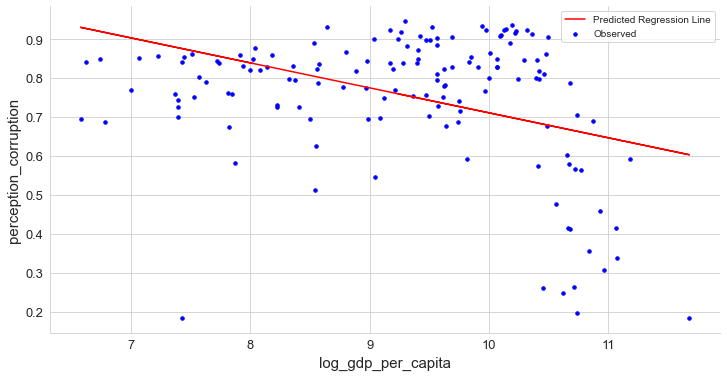

In [30]:
seabornInstance.set_style(style='whitegrid')
plt.figure(figsize=(12,6))
plt.scatter(X_test,y_test,color='blue',label="Observed", s = 12)
plt.plot(X_test,model.predict(X_test),color="red",label="Predicted Regression Line")
plt.xlabel("log_gdp_per_capita", fontsize=15)
plt.ylabel("perception_corruption", fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

In [31]:
train_data, test_data = train_test_split(df, train_size = 0.2, random_state = 3)
model = LinearRegression()
X_train = np.array(train_data['social_support'],
                   dtype = pd.Series).reshape(-1,1)
y_train = np.array(train_data['perceptions_of_corruption'], dtype = pd.Series)
model.fit(X_train, y_train)

X_test = np.array(test_data['social_support'], 
                    dtype = pd.Series).reshape(-1,1)
y_test = np.array(test_data['perceptions_of_corruption'], dtype = pd.Series)

pred = model.predict(X_test)
#ROOT MEAN SQUARED ERROR
rmsesm = float(format(np.sqrt(mean_squared_error(y_test,pred)),'.3f'))
#R-SQUARED (TRAINING)
rtrsm = float(format(model.score(X_train, y_train),'.3f'))
#R-SQUARED (TEST)
rtesm = float(format(model.score(X_test, y_test),'.3f'))
cv = float(format(cross_val_score(model,df[['social_support']],df['perceptions_of_corruption'],cv=5).mean(),'.3f'))

print ("Average Score for Test Data: {:.3f}".format(y_test.mean()))
print('Intercept: {}'.format(model.intercept_))
print('Coefficient: {}'.format(model.coef_))
print('Corruption score = ',np.round(model.intercept_,4),
      '+',np.round(model.coef_,4),'*social_support ')

r = aval.shape[0]
aval.loc[r] = ['Simple Linear Regression social_support ','-',rmsesm,rtrsm,'-',rtesm,'-',cv]
aval

Average Score for Test Data: 0.754
Intercept: 0.9797567263603878
Coefficient: [-0.27999429]
Corruption score =  0.9798 + [-0.28] *social_support 


,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared(test),5-Fold Cross Validation
0,Simple Linear Regression log_gdp_per_capita,-,0.167,0.188,-,0.060,-,-53.356
1,Simple Linear Regression social_support,-,0.169,0.035,-,0.031,-,-52.737


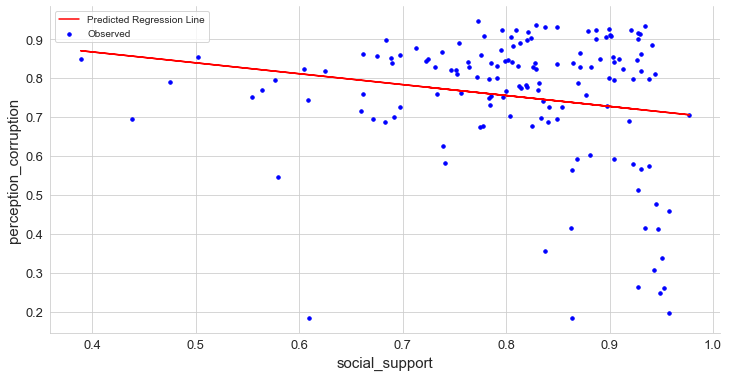

In [32]:
seabornInstance.set_style(style='whitegrid')
plt.figure(figsize=(12,6))
plt.scatter(X_test,y_test,color='blue',label="Observed", s = 12)
plt.plot(X_test,model.predict(X_test),color="red",label="Predicted Regression Line")
plt.xlabel("social_support", fontsize=15)
plt.ylabel("perception_corruption", fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

In [33]:
train_data, test_data = train_test_split(df, train_size = 0.2, random_state = 3)
model = LinearRegression()
X_train = np.array(train_data['healthy_life_expectancy_at_birth'],
                   dtype = pd.Series).reshape(-1,1)
y_train = np.array(train_data['perceptions_of_corruption'], dtype = pd.Series)
model.fit(X_train, y_train)

X_test = np.array(test_data['healthy_life_expectancy_at_birth'], 
                    dtype = pd.Series).reshape(-1,1)
y_test = np.array(test_data['perceptions_of_corruption'], dtype = pd.Series)

pred = model.predict(X_test)
#ROOT MEAN SQUARED ERROR
rmsesm = float(format(np.sqrt(mean_squared_error(y_test,pred)),'.3f'))
#R-SQUARED (TRAINING)
rtrsm = float(format(model.score(X_train, y_train),'.3f'))
#R-SQUARED (TEST)
rtesm = float(format(model.score(X_test, y_test),'.3f'))
cv = float(format(cross_val_score(model,df[['healthy_life_expectancy_at_birth']],df['perceptions_of_corruption'],cv=5).mean(),'.3f'))

print ("Average Score for Test Data: {:.3f}".format(y_test.mean()))
print('Intercept: {}'.format(model.intercept_))
print('Coefficient: {}'.format(model.coef_))
print('Corruption score = ',np.round(model.intercept_,4),
      '+',np.round(model.coef_,4),'*healthy_life_expectancy_at_birth')

r = aval.shape[0]
aval.loc[r] = ['Simple Linear Regression healthy_life_expectancy_at_birth ','-',rmsesm,rtrsm,'-',rtesm,'-',cv]
aval

Average Score for Test Data: 0.754
Intercept: 1.320037330608417
Coefficient: [-0.00878876]
Corruption score =  1.32 + [-0.0088] *healthy_life_expectancy_at_birth


,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared(test),5-Fold Cross Validation
0,Simple Linear Regression log_gdp_per_capita,-,0.167,0.188,-,0.060,-,-53.356
1,Simple Linear Regression social_support,-,0.169,0.035,-,0.031,-,-52.737
2,Simple Linear Regression healthy_life_expectan...,-,0.167,0.122,-,0.049,-,-53.314


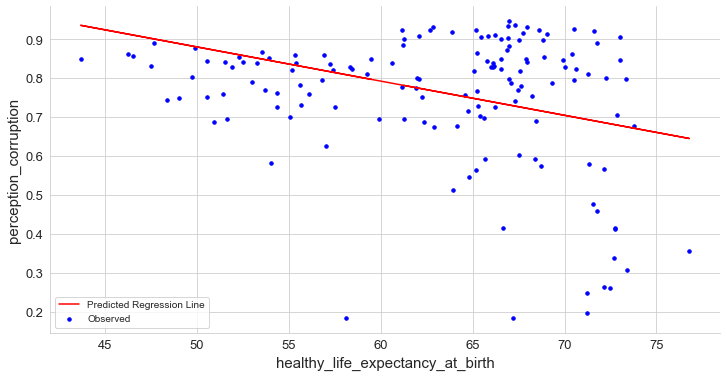

In [34]:
seabornInstance.set_style(style='whitegrid')
plt.figure(figsize=(12,6))
plt.scatter(X_test,y_test,color='blue',label="Observed", s = 12)
plt.plot(X_test,model.predict(X_test),color="red",label="Predicted Regression Line")
plt.xlabel("healthy_life_expectancy_at_birth", fontsize=15)
plt.ylabel("perception_corruption", fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

In [35]:
train_data, test_data = train_test_split(df, train_size = 0.2, random_state = 3)
model = LinearRegression()
X_train = np.array(train_data['freedom_to_make_life_choices'],
                   dtype = pd.Series).reshape(-1,1)
y_train = np.array(train_data['perceptions_of_corruption'], dtype = pd.Series)
model.fit(X_train, y_train)

X_test = np.array(test_data['freedom_to_make_life_choices'], 
                    dtype = pd.Series).reshape(-1,1)
y_test = np.array(test_data['perceptions_of_corruption'], dtype = pd.Series)

pred = model.predict(X_test)
#ROOT MEAN SQUARED ERROR
rmsesm = float(format(np.sqrt(mean_squared_error(y_test,pred)),'.3f'))
#R-SQUARED (TRAINING)
rtrsm = float(format(model.score(X_train, y_train),'.3f'))
#R-SQUARED (TEST)
rtesm = float(format(model.score(X_test, y_test),'.3f'))
cv = float(format(cross_val_score(model,df[['freedom_to_make_life_choices']],df['perceptions_of_corruption'],cv=5).mean(),'.3f'))

print ("Average Score for Test Data: {:.3f}".format(y_test.mean()))
print('Intercept: {}'.format(model.intercept_))
print('Coefficient: {}'.format(model.coef_))
print('Corruption score = ',np.round(model.intercept_,4),
      '+',np.round(model.coef_,4),'*freedom_to_make_life_choices')

r = aval.shape[0]
aval.loc[r] = ['Simple Linear Regression freedom_to_make_life_choices ','-',rmsesm,rtrsm,'-',rtesm,'-',cv]
aval

Average Score for Test Data: 0.754
Intercept: 1.4648042400087677
Coefficient: [-0.94797644]
Corruption score =  1.4648 + [-0.948] *freedom_to_make_life_choices


,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared(test),5-Fold Cross Validation
0,Simple Linear Regression log_gdp_per_capita,-,0.167,0.188,-,0.060,-,-53.356
1,Simple Linear Regression social_support,-,0.169,0.035,-,0.031,-,-52.737
2,Simple Linear Regression healthy_life_expectan...,-,0.167,0.122,-,0.049,-,-53.314
3,Simple Linear Regression freedom_to_make_life_...,-,0.157,0.277,-,0.166,-,-50.450


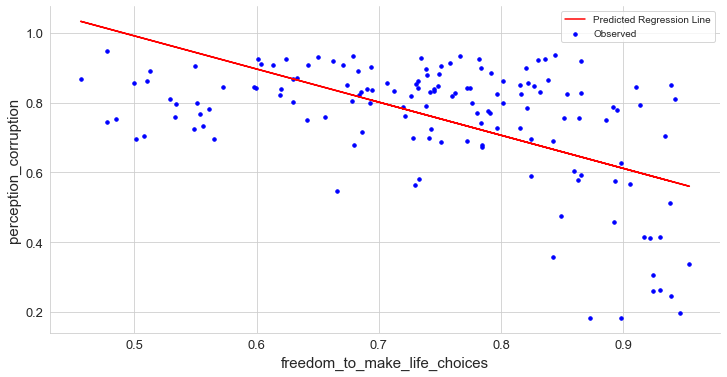

In [36]:
seabornInstance.set_style(style='whitegrid')
plt.figure(figsize=(12,6))
plt.scatter(X_test,y_test,color='blue',label="Observed", s = 12)
plt.plot(X_test,model.predict(X_test),color="red",label="Predicted Regression Line")
plt.xlabel("freedom_to_make_life_choices", fontsize=15)
plt.ylabel("perception_corruption", fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

In [37]:
train_data, test_data = train_test_split(df, train_size = 0.2, random_state = 3)
model = LinearRegression()
X_train = np.array(train_data['generosity'],
                   dtype = pd.Series).reshape(-1,1)
y_train = np.array(train_data['perceptions_of_corruption'], dtype = pd.Series)
model.fit(X_train, y_train)

X_test = np.array(test_data['generosity'], 
                    dtype = pd.Series).reshape(-1,1)
y_test = np.array(test_data['perceptions_of_corruption'], dtype = pd.Series)

pred = model.predict(X_test)
#ROOT MEAN SQUARED ERROR
rmsesm = float(format(np.sqrt(mean_squared_error(y_test,pred)),'.3f'))
#R-SQUARED (TRAINING)
rtrsm = float(format(model.score(X_train, y_train),'.3f'))
#R-SQUARED (TEST)
rtesm = float(format(model.score(X_test, y_test),'.3f'))
cv = float(format(cross_val_score(model,df[['generosity']],df['perceptions_of_corruption'],cv=5).mean(),'.3f'))

print ("Average Score for Test Data: {:.3f}".format(y_test.mean()))
print('Intercept: {}'.format(model.intercept_))
print('Coefficient: {}'.format(model.coef_))
print('Corruption score = ',np.round(model.intercept_,4),
      '+',np.round(model.coef_,4),'*generosity')

r = aval.shape[0]
aval.loc[r] = ['Simple Linear Regression generosity ','-',rmsesm,rtrsm,'-',rtesm,'-',cv]
aval

Average Score for Test Data: 0.754
Intercept: 0.7463726989896283
Coefficient: [-0.2522529]
Corruption score =  0.7464 + [-0.2523] *generosity


,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared(test),5-Fold Cross Validation
0,Simple Linear Regression log_gdp_per_capita,-,0.167,0.188,-,0.060,-,-53.356
1,Simple Linear Regression social_support,-,0.169,0.035,-,0.031,-,-52.737
2,Simple Linear Regression healthy_life_expectan...,-,0.167,0.122,-,0.049,-,-53.314
3,Simple Linear Regression freedom_to_make_life_...,-,0.157,0.277,-,0.166,-,-50.450
4,Simple Linear Regression generosity,-,0.162,0.067,-,0.106,-,-46.546


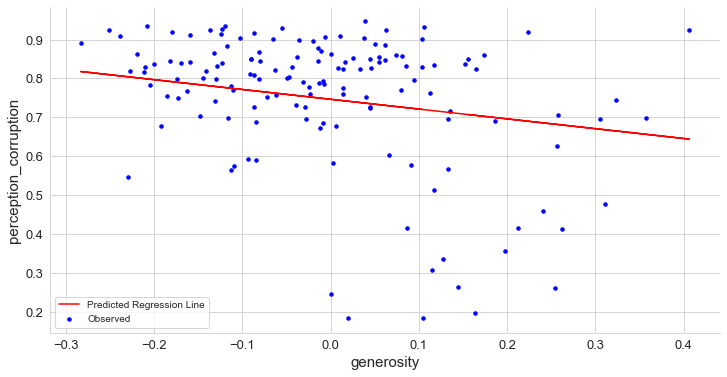

In [38]:
seabornInstance.set_style(style='whitegrid')
plt.figure(figsize=(12,6))
plt.scatter(X_test,y_test,color='blue',label="Observed", s = 12)
plt.plot(X_test,model.predict(X_test),color="red",label="Predicted Regression Line")
plt.xlabel("generosity", fontsize=15)
plt.ylabel("perception_corruption", fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

In [39]:
train_data, test_data = train_test_split(df, train_size = 0.2, random_state = 3)
model = LinearRegression()
X_train = np.array(train_data['life_ladder'],
                   dtype = pd.Series).reshape(-1,1)
y_train = np.array(train_data['perceptions_of_corruption'], dtype = pd.Series)
model.fit(X_train, y_train)

X_test = np.array(test_data['life_ladder'], 
                    dtype = pd.Series).reshape(-1,1)
y_test = np.array(test_data['perceptions_of_corruption'], dtype = pd.Series)

pred = model.predict(X_test)
#ROOT MEAN SQUARED ERROR
rmsesm = float(format(np.sqrt(mean_squared_error(y_test,pred)),'.3f'))
#R-SQUARED (TRAINING)
rtrsm = float(format(model.score(X_train, y_train),'.3f'))
#R-SQUARED (TEST)
rtesm = float(format(model.score(X_test, y_test),'.3f'))
cv = float(format(cross_val_score(model,df[['life_ladder']],df['perceptions_of_corruption'],cv=5).mean(),'.3f'))

print ("Average Score for Test Data: {:.3f}".format(y_test.mean()))
print('Intercept: {}'.format(model.intercept_))
print('Coefficient: {}'.format(model.coef_))
print('Corruption score = ',np.round(model.intercept_,4),
      '+',np.round(model.coef_,4),'*life_ladder')

r = aval.shape[0]
aval.loc[r] = ['Simple Linear Regression life_ladder ','-',rmsesm,rtrsm,'-',rtesm,'-',cv]
aval

Average Score for Test Data: 0.754
Intercept: 1.1564062784997864
Coefficient: [-0.07250438]
Corruption score =  1.1564 + [-0.0725] *life_ladder


,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared(test),5-Fold Cross Validation
0,Simple Linear Regression log_gdp_per_capita,-,0.167,0.188,-,0.060,-,-53.356
1,Simple Linear Regression social_support,-,0.169,0.035,-,0.031,-,-52.737
2,Simple Linear Regression healthy_life_expectan...,-,0.167,0.122,-,0.049,-,-53.314
3,Simple Linear Regression freedom_to_make_life_...,-,0.157,0.277,-,0.166,-,-50.450
4,Simple Linear Regression generosity,-,0.162,0.067,-,0.106,-,-46.546
5,Simple Linear Regression life_ladder,-,0.158,0.171,-,0.154,-,-50.982


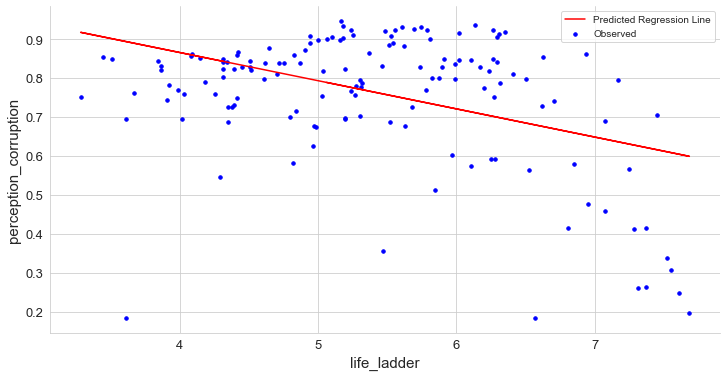

In [40]:
seabornInstance.set_style(style='whitegrid')
plt.figure(figsize=(12,6))
plt.scatter(X_test,y_test,color='blue',label="Observed", s = 12)
plt.plot(X_test,model.predict(X_test),color="red",label="Predicted Regression Line")
plt.xlabel("life_ladder", fontsize=15)
plt.ylabel("perception_corruption", fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

In [42]:
# MULTIPLE LINEAR REGRESSION 1
train_data_dm,test_data_dm = train_test_split(df,train_size = 0.2,random_state=3)
independent_var = ['log_gdp_per_capita','healthy_life_expectancy_at_birth','freedom_to_make_life_choices','social_support',
                   'generosity','life_ladder']
complex_model_1 = LinearRegression()
complex_model_1.fit(train_data_dm[independent_var],train_data_dm['perceptions_of_corruption'])
print('Intercept: {}'.format(complex_model_1.intercept_))
print('Coefficients: {}'.format(complex_model_1.coef_))
print('Happiness score = ',np.round(complex_model_1.intercept_,4),
      '+',np.round(complex_model_1.coef_[0],4),'∗ social_support',
      '+',np.round(complex_model_1.coef_[1],4),'* log_gdp_per_capita', 
      '+',np.round(complex_model_1.coef_[2],4),'* healthy_life_expectancy_at_birth',
      '+',np.round(complex_model_1.coef_[3],4),'* freedom_to_make_life_choices',
       '+',np.round(complex_model_1.coef_[4],4),'* generosity',
      '+',np.round(complex_model_1.coef_[5],4),'* life_ladder')
pred = complex_model_1.predict(test_data_dm[independent_var])
rmsecm = float(format(np.sqrt(mean_squared_error(
                       test_data_dm['perceptions_of_corruption'],pred)),'.3f'))
rtrcm = float(format(complex_model_1.score(
                        train_data_dm[independent_var],
                        train_data_dm['perceptions_of_corruption']),'.3f'))
artrcm = float(format(adjustedR2(complex_model_1.score(
                            train_data_dm[independent_var],
                            train_data_dm['perceptions_of_corruption']),
                            train_data_dm.shape[0],
                            len(independent_var)),'.3f'))
rtecm = float(format(complex_model_1.score(
                        test_data_dm[independent_var],
                        test_data_dm['perceptions_of_corruption']),'.3f'))
artecm = float(format(adjustedR2(complex_model_1.score(
                        test_data_dm[independent_var],test_data['perceptions_of_corruption']),
                        test_data_dm.shape[0],
                        len(independent_var)),'.3f'))
cv = float(format(cross_val_score(complex_model_1,
                    df[independent_var],
                    df['perceptions_of_corruption'],cv=5).mean(),'.3f'))
r = aval.shape[0]
aval.loc[r] = ['Multiple Linear Regression-1','selected features',rmsecm,rtrcm,artrcm,rtecm,artecm,cv]
aval.sort_values(by = '5-Fold Cross Validation', ascending=False)            
               

Intercept: 1.4947442348874902
Coefficients: [-0.09851438  0.00188588 -0.60496475  0.67633475 -0.13124031 -0.00762529]
Happiness score =  1.4947 + -0.0985 ∗ social_support + 0.0019 * log_gdp_per_capita + -0.605 * healthy_life_expectancy_at_birth + 0.6763 * freedom_to_make_life_choices + -0.1312 * generosity + -0.0076 * life_ladder


,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared(test),5-Fold Cross Validation
4,Simple Linear Regression generosity,-,0.162,0.067,-,0.106,-,-46.546
6,Multiple Linear Regression-1,selected features,0.148,0.406,0.307,0.260,0.233,-47.655
3,Simple Linear Regression freedom_to_make_life_...,-,0.157,0.277,-,0.166,-,-50.450
5,Simple Linear Regression life_ladder,-,0.158,0.171,-,0.154,-,-50.982
1,Simple Linear Regression social_support,-,0.169,0.035,-,0.031,-,-52.737
2,Simple Linear Regression healthy_life_expectan...,-,0.167,0.122,-,0.049,-,-53.314
0,Simple Linear Regression log_gdp_per_capita,-,0.167,0.188,-,0.060,-,-53.356


In [44]:
# MULTIPLE LINEAR REGRESSION 2
train_data_dm,test_data_dm = train_test_split(df,train_size = 0.2,random_state=3)

independent_var = ['log_gdp_per_capita','healthy_life_expectancy_at_birth','social_support']
complex_model_2 = LinearRegression()
complex_model_2.fit(train_data_dm[independent_var],train_data_dm['perceptions_of_corruption'])



print('Intercept: {}'.format(complex_model_2.intercept_))
print('Coefficients: {}'.format(complex_model_2.coef_))
print('Happiness score = ',np.round(complex_model_2.intercept_,4),
      '+',np.round(complex_model_2.coef_[0],4),'∗ social_support',
      '+',np.round(complex_model_2.coef_[1],4),'* log_gdp_per_capita', 
      '+',np.round(complex_model_2.coef_[2],4),'* healthy_life_expectancy_at_birth')
pred = complex_model_2.predict(test_data_dm[independent_var])
rmsecm = float(format(np.sqrt(mean_squared_error(
                       test_data_dm['perceptions_of_corruption'],pred)),'.3f'))
rtrcm = float(format(complex_model_2.score(
                        train_data_dm[independent_var],
                        train_data_dm['perceptions_of_corruption']),'.3f'))
artrcm = float(format(adjustedR2(complex_model_2.score(
                            train_data_dm[independent_var],
                            train_data_dm['perceptions_of_corruption']),
                            train_data_dm.shape[0],
                            len(independent_var)),'.3f'))
rtecm = float(format(complex_model_2.score(
                        test_data_dm[independent_var],
                        test_data_dm['perceptions_of_corruption']),'.3f'))
artecm = float(format(adjustedR2(complex_model_2.score(
                        test_data_dm[independent_var],test_data['perceptions_of_corruption']),
                        test_data_dm.shape[0],
                        len(independent_var)),'.3f'))
cv = float(format(cross_val_score(complex_model_2,
                    df[independent_var],
                    df['perceptions_of_corruption'],cv=5).mean(),'.3f'))

r = aval.shape[0]
aval.loc[r] = ['Multiple Linear Regression-2','selected features',rmsecm,rtrcm,artrcm,rtecm,artecm,cv]
aval.sort_values(by = '5-Fold Cross Validation', ascending=False)

Intercept: 1.263201168216757
Coefficients: [-0.12256484  0.00270896  0.56262399]
Happiness score =  1.2632 + -0.1226 ∗ social_support + 0.0027 * log_gdp_per_capita + 0.5626 * healthy_life_expectancy_at_birth


,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared(test),5-Fold Cross Validation
4,Simple Linear Regression generosity,-,0.162,0.067,-,0.106,-,-46.546
6,Multiple Linear Regression-1,selected features,0.148,0.406,0.307,0.260,0.233,-47.655
3,Simple Linear Regression freedom_to_make_life_...,-,0.157,0.277,-,0.166,-,-50.450
5,Simple Linear Regression life_ladder,-,0.158,0.171,-,0.154,-,-50.982
1,Simple Linear Regression social_support,-,0.169,0.035,-,0.031,-,-52.737
2,Simple Linear Regression healthy_life_expectan...,-,0.167,0.122,-,0.049,-,-53.314
0,Simple Linear Regression log_gdp_per_capita,-,0.167,0.188,-,0.060,-,-53.356
7,Multiple Linear Regression-2,selected features,0.171,0.250,0.205,0.010,-0.004,-53.520
